(HW2)=
# HW2

## Task 2.1 (0.5 points)

Show that similar matrices have equal determinants: $\det \boldsymbol A = \det \boldsymbol B$ if $\boldsymbol A \sim \boldsymbol B$.

### YOUR SOLUTION HERE

If $A \sim B$, then $A = P^{-1}BP$
$$AP^{-1} = P^{-1}BPP^{-1} = P^{-1}B $$
$$ \det AP^{-1}= \det P^{-1}B$$
$$ \det A  * \det P^{-1} = \det P^{-1} * \det B$$
Since, P is invertible, its determinant is non-zero, therefore we can divide both sides by $P^{-1}$

$$\det A = \det B$$

## Task 2.2 (0.5 points)

Prove that all eigenvalues of a projection matrix
are equal either to $0$ or $1$.

### YOUR SOLUTION HERE
Firstly, recall that a projection matrix P satisfies the property $P^{2} = P$
Now, let $\lambda$ be an eigenvalue of P and v be eigenvector. This means that:
$$Pv = \lambda v$$
$$PPv = \lambda Pv$$
$$P^{2}v = Pv = \lambda Pv$$
We know that $Pv = \lambda v$, therefore:
$$\lambda v = \lambda^{2}v$$
$$\lambda  = \lambda^{2}$$
The roots of this equations are 0 and 1.

## Task 2.3 (1 point)

**Hilbert matrix** is a square matrix with entries $H_{ij} = \frac 1{i + j - 1}$. Hilbert matrices can be created by `scipy.linalg.hilbert`:

In [3]:
import numpy as np
from scipy.linalg import hilbert
hilbert(3)

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]])

[Wikipedia](https://en.wikipedia.org/wiki/Hilbert_matrix) says that the condition number of $n\times n$ Hilbert matrix grows as $O\Big(\frac 1{\sqrt n}\big(1 + \sqrt{2}\big)^{4n}\Big)$. Check this fact numerically. Calculate $\kappa_n$ for $n= 1, \ldots, 20$, and plot its graph along with the graph of the sequence inside big-O.

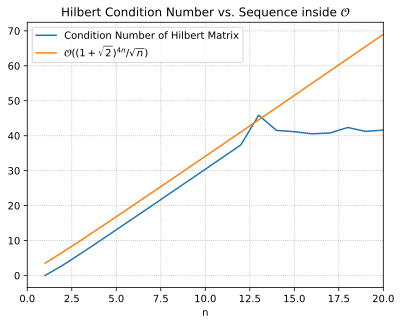

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

%config InlineBackend.figure_format = 'svg'

def hilbert_condition_number(n):
    H = hilbert(n)
    cond_H = np.linalg.cond(H)
    return cond_H

def big_O_sequence(n):
    return ((1+ np.sqrt(2))**(4*n)) / np.sqrt(n)

def plot_hilbert_cond(n_max):
    ns = np.arange(1, n_max + 1)
    cond_values = [np.log(hilbert_condition_number(n)) for n in ns]
    big_O_values = [np.log(big_O_sequence(n)) for n in ns]
    
    plt.plot(ns, cond_values, label="Condition Number of Hilbert Matrix")
    plt.plot(ns, big_O_values, label=r"$\mathcal{O}((1+ \sqrt{2})^{4n}/\sqrt{n})$")
    
    plt.xlim(0, n_max)
    plt.title("Hilbert Condition Number vs. Sequence inside $\mathcal{O}$")
    plt.legend()
    plt.xlabel("n")
    plt.grid(ls=":")


plot_hilbert_cond(20)

plt.show()


What can you say looking at these graphs? Does the estimation for $\kappa_n$ seem correct or not?

For a detailed comparison of two sequences of values of two functions, I took the logarithm of the values. The graph shows that the values are almost the same, but after the value x = 13, the values for the first function become almost constant. 

Graph without log:

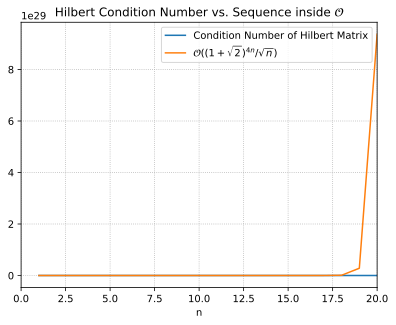

In [6]:
def plot_hilbert_cond(n_max):
    ns = np.arange(1, n_max + 1)
    cond_values = [hilbert_condition_number(n) for n in ns]
    big_O_values = [big_O_sequence(n) for n in ns]
    
    plt.plot(ns, cond_values, label="Condition Number of Hilbert Matrix")
    plt.plot(ns, big_O_values, label=r"$\mathcal{O}((1+ \sqrt{2})^{4n}/\sqrt{n})$")
    
    plt.xlim(0, n_max)
    plt.title("Hilbert Condition Number vs. Sequence inside $\mathcal{O}$")
    plt.legend()
    plt.xlabel("n")
    plt.grid(ls=":")


plot_hilbert_cond(20)

plt.show()

#### Task 2.4 (1 point)

Let $\boldsymbol u_1, \ldots, \boldsymbol u_r \in\mathbb R^{n}$ be an orthonormal system of vectors, $1 \leqslant r \leqslant n$, and

$$
\boldsymbol A = \sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T}, \quad \sigma_1 \geqslant \sigma_2 \geqslant \ldots \geqslant \sigma_r > 0.
$$

Show that $\boldsymbol A$ is symmetric and semi-positive definite, i.e., $\boldsymbol A^\mathsf{T} =\boldsymbol A$ and $\boldsymbol x^\mathsf{T}\boldsymbol{Ax} \geqslant 0$ for all $\boldsymbol x \in\mathbb R^n$. Under which condition $\boldsymbol A$ is positive definite?

### YOUR SOLUTION  HERE
To show that the matrix A is symmetric, we need to demonstrate that $ A^\mathsf{T} =A$. $\sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T}$ is one-rank matrix and transpose of one-rank matrix is itself. Therefore, A is symmertic.

To show that the matrix A is semi-positive definite, i.e, $ x^\mathsf{T}Ax \geqslant 0$: 
$$ x^\mathsf{T}Ax = x^\mathsf{T}(\sum\limits_{i=1}^r \sigma_i \boldsymbol u_i \boldsymbol u_i^{\mathsf T})x = \sum\limits_{i=1}^r \sigma_i (x^\mathsf{T}\boldsymbol u_i) (\boldsymbol u_i^{\mathsf T}x)$$
Since, $\boldsymbol u_1, \ldots, \boldsymbol u_r \in\mathbb R^{n}$ from an orthonormal system, we have $x^\mathsf{T}\boldsymbol u_i = \boldsymbol u_i^{\mathsf T}x$ and $$x^\mathsf{T}Ax =\sum\limits_{i=1}^r \sigma_i (x\boldsymbol u_i)^{2} $$. Since we have second power, $\boldsymbol x^\mathsf{T}\boldsymbol{Ax} \geqslant 0$.

$\boldsymbol A$ is positive definite, if all eigenvalues of A are positive, i.e, $\sigma_i > 0$ for all i. 

## Task 2.5 (1 point)

Take a **colored** image which has at least $300$ pixels in both width and height and apply SVD like it is done {ref}`here <image-svd>`. Display several low-rank approximations to your image and plot the graph of errors $\Vert \boldsymbol A - \hat{\boldsymbol A}_r\Vert_F$ for all possible $r$.

An image can be read, for example, by `plt.imread`:

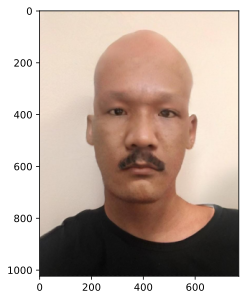

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import requests
import io
from PIL import Image
from sys import getsizeof

%config InlineBackend.figure_format = 'svg'

r = requests.get('https://github.com/Assanali18/intro-to-ml-kbtu/blob/main/olzhas.jpg?raw=true', stream=True)
img = Image.open(io.BytesIO(r.content))
plt.imshow(img);

In [8]:
X = np.array(img)
x = X[:, :, 0]
rk = np.linalg.matrix_rank(x)
print("Shape:", x.shape)
print("Rank:", rk)

Shape: (1024, 769)
Rank: 769


In [9]:
def compress_img(X, r):
    U, sigma, V = np.linalg.svd(X, full_matrices=True)
    x_hat = np.dot(np.dot(U[:, :r], np.diag(sigma[:r])), V[:r, :])  
    plt.imshow(x_hat, cmap='Accent')

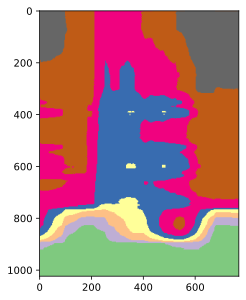

In [10]:
compress_img(x, 2)

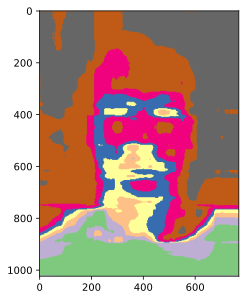

In [11]:
compress_img(x, 5)

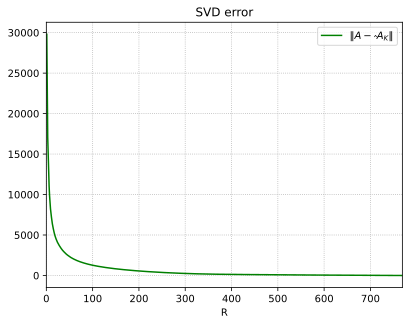

In [19]:
import matplotlib.pyplot as plt

def plot_SVD_error(X):
    r = min(X.shape)
    U, sigma, V = np.linalg.svd(X)
    diff = []
    for R in range(1, r + 1):
        x_hat = np.dot(np.dot(U[:, :R], np.diag(sigma[:R])), V[:R, :]) 
        diff.append(np.linalg.norm(X - x_hat))
    plt.plot(np.arange(1, r+1), diff, c='green',label=r"$\Vert A - \hat A_K\Vert$")
    plt.xlim(0, r)
    plt.title("SVD error")
    plt.legend()
    plt.xlabel("R")
    plt.grid(ls=":");

plot_SVD_error(x)
plt.show()

**Do not forget to attach your image to your submission!**